In [1]:
import flyvec
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
x = flyvec.FlyVec.load()

In [2]:
# x = flyvec.FlyVec.load(force_redownload=True)

100% |######################################################################################|


In [15]:
??flyvec.FlyVec.simple_word_vectors

Signature:
flyvec.FlyVec.simple_word_vectors(
    self,
    k: int = 50,
    exclude_stop_words=False,
    output_list=False,
) -> Dict[str, <built-in function array>]
Source:   
    def simple_word_vectors(self, k:int=50, exclude_stop_words=False, output_list=False)->Dict[str, np.array]:
        """Collect all the context-independent word embeddings for an arbitrary `k` hash length

        Args:
            k: Desired hash length
            exclude_stop_words: If True, exclude from the output dictionary the word vectors for stop words in the vocab

        Returns:
            Dictionary of token -> word embedding
        """

        def parse_vector(a):
            """Turn into list or no?"""
            if output_list: return list(a)
            return a

        out = {}
        for t in self.token_vocab:
            if exclude_stop_words and (t in self.stop_words):
                continue
            try:
                out[t] = parse_vector(self.get_sparse_embedding(t, hash_

In [3]:
# vects = x.simple_word_vectors()

Invalid token: `–`. Continuing.
Original Error:

 list index out of range
Invalid token: `…`. Continuing.
Original Error:

 list index out of range
Invalid token: `—`. Continuing.
Original Error:

 list index out of range
Invalid token: `•`. Continuing.
Original Error:

 list index out of range
Invalid token: `”`. Continuing.
Original Error:

 list index out of range
Invalid token: ``. Continuing.
Original Error:

 list index out of range
Invalid token: `​`. Continuing.
Original Error:

 list index out of range
Invalid token: `×`. Continuing.
Original Error:

 list index out of range
Invalid token: `±`. Continuing.
Original Error:

 list index out of range
Invalid token: `−`. Continuing.
Original Error:

 list index out of range
Invalid token: `»`. Continuing.
Original Error:

 list index out of range
Invalid token: `«`. Continuing.
Original Error:

 list index out of range
Invalid token: `…”`. Continuing.
Original Error:

 list index out of range
Invalid token: `©`. Continuing.
Origi

In [5]:
import math

In [47]:
x.tokenizer_file

'/home/sherman/.cache/flyvec/data/tokenizer/gensim1_patched.dict'

In [42]:
math.log2(math.comb(400, 50))

213.3719762621861

In [39]:
2**400

2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747493376

In [33]:
[(k, v.sum()) for k, v in vects.items() if v.sum() != 50]

[('nsa’s', 0),
 ('toronto’s', 0),
 ('pokémon', 0),
 ('françois', 0),
 ('anyone’s', 0),
 ('ryan’s', 0),
 ('naïve', 0),
 ('life’s', 0),
 ('o’malley', 0),
 ('body’s', 0),
 ('society’s', 0),
 ('gop’s', 0),
 ('mexico’s', 0),
 ('military’s', 0),
 ('africa’s', 0),
 ('community’s', 0),
 ('café', 0),
 ('ireland’s', 0),
 ('could’ve', 0),
 ('cliché', 0),
 ('lee’s', 0),
 ('seattle’s', 0),
 ('cia’s', 0),
 ('media’s', 0),
 ('study’s', 0),
 ('o’clock', 0),
 ('assad’s', 0),
 ('o’neill', 0),
 ('comey’s', 0),
 ('nbc’s', 0),
 ('everybody’s', 0),
 ('harper’s', 0),
 ('florida’s', 0),
 ('that’ll', 0),
 ('josé', 0),
 ('ford’s', 0),
 ('disney’s', 0),
 ('cruz’s', 0),
 ('niño', 0),
 ('yesterday’s', 0),
 ('hillary’s', 0),
 ('marvel’s', 0),
 ('o’connor', 0),
 ('<UNK>', 0),
 ('<NUM>', 0)]

<AxesSubplot:>

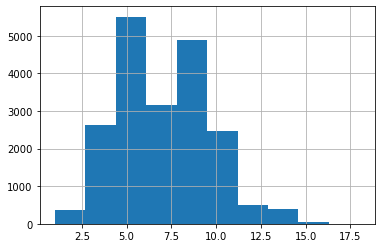

In [25]:
pd.Series(vects.keys()).apply(len).hist()

In [49]:
x.tokenizer.tokenize("hello world for all")

['hello', 'world', 'for', 'all']

In [6]:
def get_dense_context_word_embedding(phrase):
    self = x
    if self.is_unknown_token(phrase): return self.unknown_embedding_info

    tokens = self.tokenizer.tokenize(phrase)
    assert len(tokens) % 2
    tok_ids = [self.tokenizer.token2id(token) for token in tokens]
    target_index = len(tokens)//2
    tok_ids[target_index] += self.n_vocab
    activation_scores = self.synapses[:, tok_ids].sum(1)
    return activation_scores
    #     activation_scores = self.synapses[:, self.n_vocab + tok_id] # Target word embedding is stored in second compartment of matrix


In [7]:
x.tokenizer.token2id("wok")

0

In [8]:
def get_dense_context_word_embedding_v2(phrase):
    self = x
    if self.is_unknown_token(phrase): return self.unknown_embedding_info

    tokens = self.tokenizer.tokenize(phrase)
    tok_ids = [self.tokenizer.token2id(token)+self.n_vocab for token in tokens if token not in self.stop_words]
    activation_scores = self.synapses[:, tok_ids].sum(1)
    return activation_scores
    #     activation_scores = self.synapses[:, self.n_vocab + tok_id] # Target word embedding is stored in second compartment of matrix


In [9]:
def get_dense_context_word_embeddings(phrase):
    self = x
    if self.is_unknown_token(phrase): return self.unknown_embedding_info

    tokens = self.tokenizer.tokenize(phrase)
    assert len(tokens) % 2
    tok_ids = [self.tokenizer.token2id(token) for token in tokens]
    target_index = len(tokens)//2
    tok_ids[target_index] += self.n_vocab
    activation_scores = self.synapses[:, tok_ids]
    return activation_scores
    #     activation_scores = self.synapses[:, self.n_vocab + tok_id] # Target word embedding is stored in second compartment of matrix


In [10]:
def sparsify(embedding, hash_length=50):
    i_sorted = np.argsort(-embedding)
    embedding_sort = embedding[i_sorted]
    thr = (embedding_sort[hash_length - 1] + embedding_sort[hash_length]) / 2.0
    binary = (embedding > thr).astype(np.int8)
    return binary

In [11]:
def batch_sparsify(embeddings, hash_length=50):
    i_sorted = np.argsort(-embeddings, 0)  # (dim, batch_size)
    embeddings_sort = np.take_along_axis(embeddings, i_sorted, 0)  # (dim, batch_size)
    thr = (embeddings_sort[hash_length - 1, :] + embeddings_sort[hash_length, :]) / 2.0  # (batch_size)
    binary = (embeddings > thr).astype(np.int8)
    return binary

In [12]:
def get_all_target_embeddings(hash_length=50):
    embeddings = x.synapses[:, x.n_vocab:]  # (dim, batch_size)
    return batch_sparsify(embeddings, hash_length)

In [13]:
words = """AFRICA
AGENT
AIR
ALIEN
ALPS
AMAZON
AMBULANCE
AMERICA
ANGEL
ANTARCTICA
APPLE
ARM
ATLANTIS
AUSTRALIA
AZTEC
BACK
BALL
BAND
BANK
BAR
BARK
BAT
BATTERY
BEACH
BEAR
BEAT
BED
BEIJING
BELL
BELT
BERLIN
BERMUDA
BERRY
BILL
BLOCK
BOARD
BOLT
BOMB
BOND
BOOM
BOOT
BOTTLE
BOW
BOX
BRIDGE
BRUSH
BUCK
BUFFALO
BUG
BUGLE
BUTTON
CALF
CANADA
CAP
CAPITAL
CAR
CARD
CARROT
CASINO
CAST
CAT
CELL
CENTAUR
CENTER
CHAIR
CHANGE
CHARGE
CHECK
CHEST
CHICK
CHINA
CHOCOLATE
CHURCH
CIRCLE
CLIFF
CLOAK
CLUB
CODE
COLD
COMIC
COMPOUND
CONCERT
CONDUCTOR
CONTRACT
COOK
COPPER
COTTON
COURT
COVER
CRANE
CRASH
CRICKET
CROSS
CROWN
CYCLE
CZECH
DANCE
DATE
DAY
DEATH
DECK
DEGREE
DIAMOND
DICE
DINOSAUR
DISEASE
DOCTOR
DOG
DRAFT
DRAGON
DRESS
DRILL
DROP
DUCK
DWARF
EAGLE
EGYPT
EMBASSY
ENGINE
ENGLAND
EUROPE
EYE
FACE
FAIR
FALL
FAN
FENCE
FIELD
FIGHTER
FIGURE
FILE
FILM
FIRE
FISH
FLUTE
FLY
FOOT
FORCE
FOREST
FORK
FRANCE
GAME
GAS
GENIUS
GERMANY
GHOST
GIANT
GLASS
GLOVE
GOLD
GRACE
GRASS
GREECE
GREEN
GROUND
HAM
HAND
HAWK
HEAD
HEART
HELICOPTER
HIMALAYAS
HOLE
HOLLYWOOD
HONEY
HOOD
HOOK
HORN
HORSE
HORSESHOE
HOSPITAL
HOTEL
ICE
ICE CREAM
INDIA
IRON
IVORY
JACK
JAM
JET
JUPITER
KANGAROO
KETCHUP
KEY
KID
KING
KIWI
KNIFE
KNIGHT
LAB
LAP
LASER
LAWYER
LEAD
LEMON
LEPRECHAUN
LIFE
LIGHT
LIMOUSINE
LINE
LINK
LION
LITTER
LOCH NESS
LOCK
LOG
LONDON
LUCK
MAIL
MAMMOTH
MAPLE
MARBLE
MARCH
MASS
MATCH
MERCURY
MEXICO
MICROSCOPE
MILLIONAIRE
MINE
MINT
MISSILE
MODEL
MOLE
MOON
MOSCOW
MOUNT
MOUSE
MOUTH
MUG
NAIL
NEEDLE
NET
NEW YORK
NIGHT
NINJA
NOTE
NOVEL
NURSE
NUT
OCTOPUS
OIL
OLIVE
OLYMPUS
OPERA
ORANGE
ORGAN
PALM
PAN
PANTS
PAPER
PARACHUTE
PARK
PART
PASS
PASTE
PENGUIN
PHOENIX
PIANO
PIE
PILOT
PIN
PIPE
PIRATE
PISTOL
PIT
PITCH
PLANE
PLASTIC
PLATE
PLATYPUS
PLAY
PLOT
POINT
POISON
POLE
POLICE
POOL
PORT
POST
POUND
PRESS
PRINCESS
PUMPKIN
PUPIL
PYRAMID
QUEEN
RABBIT
RACKET
RAY
REVOLUTION
RING
ROBIN
ROBOT
ROCK
ROME
ROOT
ROSE
ROULETTE
ROUND
ROW
RULER
SATELLITE
SATURN
SCALE
SCHOOL
SCIENTIST
SCORPION
SCREEN
SCUBA DIVER
SEAL
SERVER
SHADOW
SHAKESPEARE
SHARK
SHIP
SHOE
SHOP
SHOT
SINK
SKYSCRAPER
SLIP
SLUG
SMUGGLER
SNOW
SNOWMAN
SOCK
SOLDIER
SOUL
SOUND
SPACE
SPELL
SPIDER
SPIKE
SPINE
SPOT
SPRING
SPY
SQUARE
STADIUM
STAFF
STAR
STATE
STICK
STOCK
STRAW
STREAM
STRIKE
STRING
SUB
SUIT
SUPERHERO
SWING
SWITCH
TABLE
TABLET
TAG
TAIL
TAP
TEACHER
TELESCOPE
TEMPLE
THEATER
THIEF
THUMB
TICK
TIE
TIME
TOKYO
TOOTH
TORCH
TOWER
TRACK
TRAIN
TRIANGLE
TRIP
TRUNK
TUBE
TURKEY
UNDERTAKER
UNICORN
VACUUM
VAN
VET
WAKE
WALL
WAR
WASHER
WASHINGTON
WATCH
WATER
WAVE
WEB
WELL
WHALE
WHIP
WIND
WITCH
WORM
YARD"""

In [14]:
[i for i in words.splitlines() if x.is_unknown_token(i)]

['ALPS',
 'AZTEC',
 'BERMUDA',
 'BUGLE',
 'CENTAUR',
 'FLUTE',
 'HIMALAYAS',
 'HORSESHOE',
 'KANGAROO',
 'KETCHUP',
 'KIWI',
 'LEPRECHAUN',
 'LIMOUSINE',
 'LOCH NESS',
 'MOLE',
 'OLYMPUS',
 'PLATYPUS',
 'ROULETTE',
 'SCORPION',
 'SCUBA DIVER',
 'SKYSCRAPER',
 'SLUG',
 'SMUGGLER',
 'SNOWMAN',
 'SOCK',
 'UNDERTAKER',
 'WASHER']

In [15]:
target_embeddings = get_all_target_embeddings()

In [44]:
np.abs(apple_sweet-x.get_sparse_embedding("cinnamon")["embedding"]).sum()

NameError: name 'apple_sweet' is not defined

In [43]:
def get_mean_sparse_context_word_embedding(phrase):
    return np.mean([x.get_sparse_embedding(token)["embedding"] if token not in x.stop_words else np.zeros(400) for token in x.tokenizer.tokenize(phrase)], 0)

In [17]:
def get_mean_sparse_context_word_embedding_v2(phrase):
    sparse_embeddings = batch_sparsify(get_dense_context_word_embeddings(phrase))
    return np.mean(sparse_embeddings, 1)

In [18]:
def get_sparse_context_word_embedding(phrase):
    return sparsify(get_dense_context_word_embedding(phrase))

In [19]:
def get_sparse_context_word_embedding_v2(phrase):
    return sparsify(get_dense_context_word_embedding_v2(phrase))

In [20]:
def get_k_closest_words(phrase, k=10):
    embedding = get_sparse_context_word_embedding(phrase)
    distances = np.abs(target_embeddings-embedding[:, None]).sum(0)
    dist_tokens = np.argsort(distances)[:k]
    distances = distances[dist_tokens]
    tokens = [x.tokenizer.id2token(i) for i in dist_tokens]
    return tokens, distances

In [21]:
def get_k_closest_words_mean(phrase, k=10):
    embedding = get_mean_sparse_context_word_embedding(phrase)
    distances = np.square(target_embeddings-embedding[:, None]).sum(0)
    dist_tokens = np.argsort(distances)[:k]
    distances = distances[dist_tokens]
    tokens = [x.tokenizer.id2token(i) for i in dist_tokens]
    return tokens, distances

In [22]:
def get_k_closest_words_mean_v2(phrase, k=10):
    embedding = get_mean_sparse_context_word_embedding_v2(phrase)
    distances = np.square(target_embeddings-embedding[:, None]).sum(0)
    dist_tokens = np.argsort(distances)[:k]
    distances = distances[dist_tokens]
    tokens = [x.tokenizer.id2token(i) for i in dist_tokens]
    return tokens, distances

In [23]:
def get_k_closest_words_mean_v3(phrase, k=10):
    embedding = get_sparse_context_word_embedding_v2(phrase)
    distances = np.square(target_embeddings-embedding[:, None]).sum(0)
    dist_tokens = np.argsort(distances)[:k]
    distances = distances[dist_tokens]
    tokens = [x.tokenizer.id2token(i) for i in dist_tokens]
    return tokens, distances

In [24]:
get_sparse_context_word_embedding_v2("money in bank checking account").sum()

50

In [25]:
get_k_closest_words_mean_v3("filling sweet apple pie recipe", 50)

(['caramel',
  'sweet',
  'pie',
  'cookie',
  'pineapple',
  'chocolate',
  'cake',
  'chicken',
  'pumpkin',
  'crispy',
  'pasta',
  'carrot',
  'banana',
  'fluffy',
  'jelly',
  'spicy',
  'vanilla',
  'hops',
  'boxes',
  'juice',
  'bits',
  'pink',
  'soup',
  'bacon',
  'ink',
  'broccoli',
  'apples',
  'colours',
  'lime',
  'bread',
  'egg',
  'tomato',
  'potatoes',
  'soft',
  'cheese',
  'almond',
  'cakes',
  'potato',
  'strips',
  'ginger',
  'gin',
  'scotch',
  'baked',
  'slices',
  'peach',
  'yarn',
  'whiskey',
  'juicy',
  'sausage',
  'sticky'],
 array([32, 32, 32, 34, 36, 36, 36, 36, 36, 38, 38, 38, 38, 38, 38, 38, 38,
        38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
        40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 42, 42, 42, 42, 42]))

In [26]:
get_k_closest_words_mean_v3("pig honey iron", 50)

(['iron',
  'wood',
  'pots',
  'dried',
  'rubber',
  'rods',
  'steel',
  'wax',
  'honey',
  'bamboo',
  'fruit',
  'juice',
  'charcoal',
  'clay',
  'pig',
  'cane',
  'wire',
  'leaf',
  'pulp',
  'stones',
  'powder',
  'pipe',
  'aluminum',
  'thick',
  'pipes',
  'beads',
  'mixture',
  'liquid',
  'mask',
  'diamonds',
  'copper',
  'gum',
  'ceramic',
  'feathers',
  'potato',
  'jelly',
  'metal',
  'bark',
  'foam',
  'flame',
  'yeast',
  'sand',
  'trees',
  'scent',
  'tomato',
  'shells',
  'needles',
  'rocks',
  'snake',
  'plastic'],
 array([20, 24, 30, 30, 32, 32, 32, 32, 32, 32, 32, 34, 34, 34, 34, 34, 34,
        34, 34, 34, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 38,
        38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]))

In [27]:
get_k_closest_words("filling sweet apple pie recipe")

(['pie',
  'sweet',
  'caramel',
  'hops',
  'chocolate',
  'spicy',
  'pumpkin',
  'cake',
  'soft',
  'salad'],
 array([28, 30, 32, 34, 34, 34, 34, 34, 36, 38]))

In [ ]:
get_k_closest_words("fall_graduate")

In [45]:
get_k_closest_words_mean("filling sweet apple pie recipe")

(['pie',
  'sweet',
  'recipe',
  'pumpkin',
  'soup',
  'chocolate',
  'caramel',
  'crispy',
  'pineapple',
  'pasta'],
 array([17.52, 19.92, 21.92, 21.92, 23.92, 24.32, 24.72, 25.12, 25.52,
        25.52]))

In [46]:
get_k_closest_words_mean_v3("design of apple latest iphone")

(['smartphone',
  'apples',
  'latest',
  'phones',
  'mac',
  'apple',
  'iphone',
  'samsung',
  'product',
  'tags'],
 array([34, 38, 38, 40, 40, 40, 40, 40, 42, 42]))

In [47]:
get_k_closest_words_mean("money in bank checking account")

(['account',
  'money',
  'cash',
  'checking',
  'accounts',
  'bank',
  'transactions',
  'receipts',
  'credit',
  'lenders'],
 array([26.32, 26.72, 29.12, 29.12, 29.52, 29.52, 31.52, 31.92, 31.92,
        32.32]))

In [48]:
get_k_closest_words_mean_v3("boat on the bank of the river")

(['river',
  'lake',
  'mountains',
  'mountain',
  'rivers',
  'desert',
  'waters',
  'island',
  'bay',
  'pond'],
 array([26, 34, 40, 40, 40, 42, 42, 42, 42, 44]))

In [49]:
get_k_closest_words_mean_v3("update your drivers, check the")

(['check',
  'update',
  'drivers',
  'checking',
  'tab',
  'sync',
  'print',
  'refresh',
  'checkout',
  'lock'],
 array([24, 38, 38, 38, 40, 40, 40, 42, 42, 42]))

In [63]:
apple_sweet = get_sparse_context_word_embedding("filling sweet apple pie recipe")

In [65]:
apple_phone = get_sparse_context_word_embedding("enter an apple store to")

In [66]:
chocolate = x.get_sparse_embedding("chocolate")["embedding"]

In [67]:
sweet = x.get_sparse_embedding("sweet")["embedding"]

In [68]:
crispy = x.get_sparse_embedding("crispy")["embedding"]

In [69]:
noodles = x.get_sparse_embedding("noodles")["embedding"]

In [70]:
syrup = x.get_sparse_embedding("syrup")["embedding"]

In [71]:
# x.synapses

In [72]:
np.abs(apple_sweet - noodles).sum()

50

In [59]:
q = np.array([[3, -4], [2, 1], [5, 6]])

In [60]:
q.argsort(0)

array([[1, 0],
       [0, 1],
       [2, 2]])

In [61]:
np.take_along_axis(q, q.argsort(0), 0)

array([[ 2, -4],
       [ 3,  1],
       [ 5,  6]])

In [74]:
get_k_closest_words_mean_v3("star queen soldier")

(['robin',
  'star',
  'queen',
  'captain',
  'hunter',
  'soldier',
  'mickey',
  'knight',
  'hulk',
  'princess'],
 array([34, 34, 36, 36, 38, 38, 40, 40, 40, 40]))